In [3]:
# At the beginning of the process, we need to scrapping the data from Twitter through it's API 
# by package Tweepy

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jul 15 02:45:39 2018
@author: ILOOKFORME102
"""
import tweepy
import csv
from tweepy import OAuthHandler

consumer_key = 'HcfzNWaWkDSSrSKkWSSzk6SIH'
consumer_secret = '2KUAvtpRu4dzjilbpWhkCrEUAly71WQvFhj2ptjqgURYWEqjp1'
access_token = '715066304848338944-4JZgsQ3KeWfo2oncG1B3q4XzgpjXJDY'
access_token_secret = 'PZrCebFpZo7IgdKd0FDqQqTxSeCLIISyOiX5v3vBGhWEr'

tweet_name = "realDonaldTrump"
def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method

    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)

    alltweets = []  

    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(id = screen_name,count=200)

    #save most recent tweets
    alltweets.extend(new_tweets)

    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print('getting tweets before {}'.format(oldest))

        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)

        #save most recent tweets
        alltweets.extend(new_tweets)

        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1

        print ("...{} tweets downloaded so far".format(len(alltweets)))

    #transform the tweepy tweets into a 2D array that will populate the csv 
    outtweets = [[tweet.id,len(tweet.text),tweet.text, tweet.created_at,tweet.source, tweet.favorite_count,tweet.retweet_count] for tweet in alltweets]

    #write the csv  
    with open('{}_tweets.csv'.format(screen_name), 'wt') as f:
        writer = csv.writer(f)
        writer.writerow(["ID","Length","Tweets","Date","Source","Likes","Retweets"])
        writer.writerows(outtweets)

    pass
if __name__ == '__main__':
	get_all_tweets(tweet_name)


getting tweets before 1106987911185162244
...400 tweets downloaded so far
getting tweets before 1102002565116542975
...600 tweets downloaded so far
getting tweets before 1094714204328771585
...800 tweets downloaded so far
getting tweets before 1086987568074424319
...1000 tweets downloaded so far
getting tweets before 1080616636363743233
...1200 tweets downloaded so far
getting tweets before 1073210823936495616
...1399 tweets downloaded so far
getting tweets before 1065225940836458495
...1599 tweets downloaded so far
getting tweets before 1058825551090237440
...1799 tweets downloaded so far
getting tweets before 1052888451199262724
...1998 tweets downloaded so far
getting tweets before 1047156358343282687
...2196 tweets downloaded so far
getting tweets before 1040563888125894655
...2392 tweets downloaded so far
getting tweets before 1034990940593823745
...2592 tweets downloaded so far
getting tweets before 1029332350969237503
...2792 tweets downloaded so far
getting tweets before 102293

In [6]:
# Next step is doing data visualization and some statistics on the data we have:

In [7]:
import numpy as np
import pandas as pd
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objs as go

In [66]:
# Read the csv data file by pandas:
data = pd.read_csv('realDonaldTrump_tweets.csv',encoding="utf-8")
data = data.assign(Date=pd.to_datetime(data.Date)).drop('ID', axis='columns')
data['Date'] = pd.to_datetime(data['Date'], format='%y-%m-%d %H:%M:%S')
dataT = data['Date']

In [67]:
# Let's take an overview of data:
data.head(10)

,Length,Tweets,Date,Source,Likes,Retweets
0,140,The First Step Act proves that our Country can...,2019-04-03 17:09:19,Twitter for iPhone,66584,17444
1,140,Congress must get together and immediately eli...,2019-04-03 13:45:03,Twitter for iPhone,88367,22880
2,140,...This will be a great campaign issue. I neve...,2019-04-03 13:37:14,Twitter for iPhone,60627,15416
3,139,I was never planning a vote prior to the 2020 ...,2019-04-03 13:26:53,Twitter for iPhone,92488,20834
4,124,"Today, it was my great honor to welcome @NATO ...",2019-04-02 19:59:57,Twitter for iPhone,44017,9603
5,140,"Today, we celebrate the tremendous accomplishm...",2019-04-02 19:42:48,Twitter for iPhone,59116,14176
6,140,“I haven’t seen any Democrats down here at the...,2019-04-02 14:52:09,Twitter for iPhone,116937,34460
7,23,https://t.co/jVIodsTNNH,2019-04-02 14:51:17,Twitter Media Studio,37450,11708
8,140,"After many years (decades), Mexico is apprehen...",2019-04-02 14:41:50,Twitter for iPhone,96701,24188
9,140,There is no amount of testimony or document pr...,2019-04-02 12:54:11,Twitter for iPhone,88366,21057


In [68]:
# Visualization for Donald Trump's tweets distribution:

In [69]:
trace = go.Histogram(
    x=dataT,
    marker=dict(
        color='blue'
    ),
    opacity=0.75
)

layout = go.Layout(
    title="Donald Trump's Tweets Distribution",
    height=450,
    width=1200, 
    xaxis=dict(
        title='Time'
    ),
    yaxis=dict(
        title='Number of Tweets'
    ),
    bargap=0.3,
)

data_trace = [trace]

fig = go.Figure(data=data_trace, layout=layout)
plot(fig)

 

'file:///Users/macbook/workspace/Python/thesis/temp-plot.html'

Average length of tweets: 
 121.61764705882354
Most favorite tweet by number of likes: 
Merry Christmas!
Number of likes: 498558
16 characters.

Most favorite tweet by number of retweets: 
RT @realDonaldTrump: They just didn't get it, but they do now! https://t.co/9T50NupkDy
Number of retweets: 118104
86 characters.



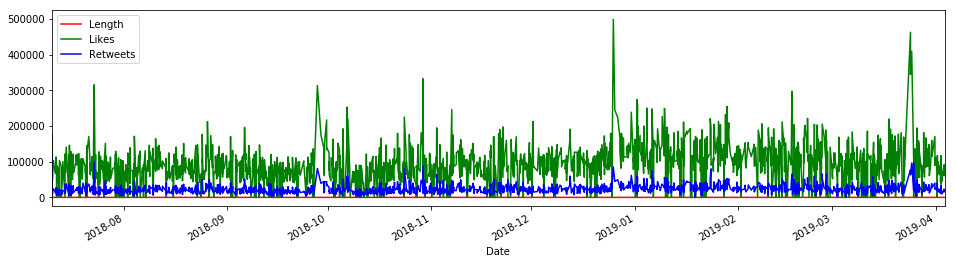

In [70]:
# Some basic statistic for the lenght of tweet
mean_length = np.mean(data['Length']) 
print("Average length of tweets: \n {}".format(mean_length))
max_like = np.max(data['Likes'])
max_retweet = np.max(data['Retweets'])

#Print out the tweets which has the most likes and retweets:
max_like_index = data[data.Likes == max_like].index[0]
max_retweet_index  = data[data.Retweets == max_retweet].index[0]

# Max likes:
print("Most favorite tweet by number of likes: \n{}".format(data['Tweets'][max_like_index]))
print("Number of likes: {}".format(max_like))
print("{} characters.\n".format(data['Length'][max_like_index]))

# Max retweets:
print("Most favorite tweet by number of retweets: \n{}".format(data['Tweets'][max_retweet_index]))
print("Number of retweets: {}".format(max_retweet))
print("{} characters.\n".format(data['Length'][max_retweet_index]))


#time series tracking the change of likes,retweets and the length of tweet 

len_by_time = pd.Series(data=data['Length'].values, index=data['Date'])
likes_by_time = pd.Series(data=data['Likes'].values, index=data['Date'])
retweets_by_time = pd.Series(data=data['Retweets'].values, index=data['Date'])

#visualization 

len_by_time.plot(figsize=(16,4), label="Length", legend=True, color='r')
# visualizing the time series of number of likes and retweets 
likes_by_time.plot(figsize=(16,4), label="Likes", legend=True,color='g')
retweets_by_time.plot(figsize=(16,4), label="Retweets", legend=True,color='b');

In [71]:
# Sentiment Analysis for the tweet data
# package used: textblob
from textblob import TextBlob
import re
import string

In [72]:
def clean_data(tweet): 
    # using regex to clean the text by removing the link from text
    tweet = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ",tweet)
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ')
	#Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('[\n]+', ' ', tweet)
	#Remove not alphanumeric symbols white spaces
    tweet = re.sub(r'[^\w]', ' ', tweet)
	#Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
	#Remove :( or :)
    tweet = tweet.replace(':)','')
    tweet = tweet.replace(':(','')
	#trim
    tweet = tweet.strip('\'"')
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    return tweet
data['clean_tweet'] = data.Tweets.apply(clean_data)
def sentiment_tweets(tweet):
    model = TextBlob(tweet)
    if model.sentiment.polarity > 0:
        return 1
    elif model.sentiment.polarity == 0:
        return 0
    else:
        return -1

data['Sentiment']= np.array([sentiment_tweets(tweet) for tweet in data['clean_tweet']])
display(data.head(10))

#anlysing the result of sentiment analysis:
pos_tweets = [ tweet for index, tweet in enumerate(data['clean_tweet']) if data['Sentiment'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['clean_tweet']) if data['Sentiment'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['clean_tweet']) if data['Sentiment'][index] < 0]

print("percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['clean_tweet'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['clean_tweet'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['clean_tweet'])))


,Length,Tweets,Date,Source,Likes,Retweets,clean_tweet,Sentiment
0,140,The First Step Act proves that our Country can...,2019-04-03 17:09:19,Twitter for iPhone,66584,17444,the first step act proves that our country can...,1
1,140,Congress must get together and immediately eli...,2019-04-03 13:45:03,Twitter for iPhone,88367,22880,congress must get together and immediately eli...,1
2,140,...This will be a great campaign issue. I neve...,2019-04-03 13:37:14,Twitter for iPhone,60627,15416,this will great campaign issue never asked mit...,1
3,139,I was never planning a vote prior to the 2020 ...,2019-04-03 13:26:53,Twitter for iPhone,92488,20834,was never planning vote prior the 2020 electio...,1
4,124,"Today, it was my great honor to welcome @NATO ...",2019-04-02 19:59:57,Twitter for iPhone,44017,9603,today was great honor welcome nato secretary g...,1
5,140,"Today, we celebrate the tremendous accomplishm...",2019-04-02 19:42:48,Twitter for iPhone,59116,14176,today celebrate the tremendous accomplishments...,1
6,140,“I haven’t seen any Democrats down here at the...,2019-04-02 14:52:09,Twitter for iPhone,116937,34460,haven seen any democrats down here the border ...,-1
7,23,https://t.co/jVIodsTNNH,2019-04-02 14:51:17,Twitter Media Studio,37450,11708,,0
8,140,"After many years (decades), Mexico is apprehen...",2019-04-02 14:41:50,Twitter for iPhone,96701,24188,after many years decades mexico apprehending l...,1
9,140,There is no amount of testimony or document pr...,2019-04-02 12:54:11,Twitter for iPhone,88366,21057,there amount testimony document production tha...,0


percentage of positive tweets: 51.036096256684495%
Percentage of neutral tweets: 30.84893048128342%
Percentage de negative tweets: 18.114973262032084%


In [73]:
#Topic Modeling for tweet data

In [74]:
from gensim import corpora, models, similarities
import warnings
warnings.filterwarnings("ignore")

In [75]:
#Create the corpus of text data

In [76]:
corpus = []


In [83]:
for tweet in data["clean_tweet"]:
    corpus.append(tweet)
print(corpus[1:40])

['congress must get together and immediately eliminate the loopholes the border action border large', 'this will great campaign issue never asked mitch mcconnell for vote before the election has been', 'was never planning vote prior the 2020 election the wonderful healthcare package that some very talented', 'today was great honor welcome nato secretary general jensstoltenberg the whitehouse', 'today celebrate the tremendous accomplishments americans with asd and reaffirm our commitment work togeth', 'haven seen any democrats down here the border working with asking speak any they have', '', 'after many years decades mexico apprehending large numbers people their southern border mostly from', 'there amount testimony document production that can satisfy jerry nadler shifty adam schiff', 'robert mueller was god like figure the democrats until ruled collusion the long awaited 000 000', 'world autism awareness day 2019 significance history and theme via httweets', '1998 rep jerry nadler st

In [84]:
# Necessary package for Topic Modeling

In [85]:
import nltk   
import gensim
import logging
import tempfile
import os
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

from gensim import corpora
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
#from command line run: python -m nltk.downloader stopwords

from nltk.corpus import stopwords
from string import punctuation


Folder "/var/folders/m_/j0tcz1vn06q4ndgrzrp_yxpm0000gn/T" will be used to save temporary dictionary and corpus.


In [86]:
#cleaning da
# remove common words and tokenize
list1 = ['RT','rt']
stoplist = stopwords.words('english') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]
dictionary = corpora.Dictionary(texts)
# store the Trump dictionary
dictionary.save(os.path.join(TEMP_FOLDER, 'trump.dict'))
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'trump.mm'), corpus)

2019-04-04 12:28:32,495 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-04-04 12:28:32,647 : INFO : adding document #10000 to Dictionary(6073 unique tokens: ['achieve', 'act', 'amazing', 'aside', 'breakthroughs']...)
2019-04-04 12:28:32,795 : INFO : adding document #20000 to Dictionary(6073 unique tokens: ['achieve', 'act', 'amazing', 'aside', 'breakthroughs']...)
2019-04-04 12:28:32,810 : INFO : built Dictionary(6073 unique tokens: ['achieve', 'act', 'amazing', 'aside', 'breakthroughs']...) from 20944 documents (total 199577 corpus positions)
2019-04-04 12:28:32,811 : INFO : saving Dictionary object under /var/folders/m_/j0tcz1vn06q4ndgrzrp_yxpm0000gn/T/trump.dict, separately None
2019-04-04 12:28:32,815 : INFO : saved /var/folders/m_/j0tcz1vn06q4ndgrzrp_yxpm0000gn/T/trump.dict
2019-04-04 12:28:33,061 : INFO : storing corpus in Matrix Market format to /var/folders/m_/j0tcz1vn06q4ndgrzrp_yxpm0000gn/T/trump.mm
2019-04-04 12:28:33,062 : INFO : saving sparse matrix to 

In [87]:

from gensim import corpora, models, similarities

tfidf_md = models.TfidfModel(corpus)
corpus_tfidf_md = tfidf_md[corpus]

2019-04-04 12:28:55,986 : INFO : collecting document frequencies
2019-04-04 12:28:55,987 : INFO : PROGRESS: processing document #0
2019-04-04 12:28:56,011 : INFO : PROGRESS: processing document #10000
2019-04-04 12:28:56,031 : INFO : PROGRESS: processing document #20000
2019-04-04 12:28:56,034 : INFO : calculating IDF weights for 20944 documents and 6072 features (195741 matrix non-zeros)


In [92]:

#main part of LDA topic modeling:
number_topics = 5
lda_model = models.LdaModel(corpus, id2word=dictionary, num_topics=number_topics)
corpus_lda = lda_model[corpus_tfidf_md]
#Show first n important word in the topics:
lda_model.show_topics(number_topics,5)
from collections import OrderedDict

data_lda = {i: OrderedDict(lda_model.show_topic(i,25)) for i in range(number_topics)}

2019-04-04 12:34:26,687 : INFO : using symmetric alpha at 0.2
2019-04-04 12:34:26,688 : INFO : using symmetric eta at 0.2
2019-04-04 12:34:26,689 : INFO : using serial LDA version on this node
2019-04-04 12:34:26,694 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 20944 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2019-04-04 12:34:26,695 : INFO : PROGRESS: pass 0, at document #2000/20944
2019-04-04 12:34:27,651 : INFO : merging changes from 2000 documents into a model of 20944 documents
2019-04-04 12:34:27,655 : INFO : topic #0 (0.200): 0.022*"great" + 0.012*"thank" + 0.009*"new" + 0.009*"realdonaldtrump" + 0.008*"vote" + 0.008*"today" + 0.008*"country" + 0.007*"america" + 0.007*"border" + 0.006*"trump"
2019-04-04 12:34:27,656 : INFO : topic #1 (0.200): 0.019*"border" + 0.015*"great" + 0.015*"people" + 0.012*"democrats" + 0.011*"

2019-04-04 12:34:30,101 : INFO : topic #4 (0.200): 0.026*"president" + 0.021*"trump" + 0.012*"news" + 0.010*"fake" + 0.008*"great" + 0.008*"whitehouse" + 0.007*"many" + 0.007*"american" + 0.006*"donald" + 0.006*"media"
2019-04-04 12:34:30,101 : INFO : topic diff=0.163013, rho=0.408248
2019-04-04 12:34:30,102 : INFO : PROGRESS: pass 0, at document #14000/20944
2019-04-04 12:34:30,516 : INFO : merging changes from 2000 documents into a model of 20944 documents
2019-04-04 12:34:30,520 : INFO : topic #0 (0.200): 0.028*"great" + 0.016*"thank" + 0.012*"america" + 0.010*"vote" + 0.009*"realdonaldtrump" + 0.009*"new" + 0.007*"tonight" + 0.006*"day" + 0.006*"make" + 0.006*"get"
2019-04-04 12:34:30,521 : INFO : topic #1 (0.200): 0.020*"border" + 0.016*"democrats" + 0.014*"wall" + 0.013*"people" + 0.013*"great" + 0.012*"security" + 0.006*"states" + 0.006*"united" + 0.006*"republican" + 0.006*"country"
2019-04-04 12:34:30,521 : INFO : topic #2 (0.200): 0.008*"realdonaldtrump" + 0.008*"years" + 0.0

In [93]:
#data_lda

import pandas as pd

df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)
df_lda

(84, 5)
(5, 84)


,administration,america,american,better,big,border,campaign,clinton,collusion,congratulations,...,vote,wall,want,way,white,whitehouse,win,witch,would,years
0,0.000000,0.012697,0.000000,0.000000,0.005820,0.000000,0.004759,0.000000,0.004775,0.006644,...,0.008320,0.000000,0.000000,0.005136,0.000000,0.000000,0.007044,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.003773,0.000000,0.017670,0.000000,0.000000,0.000000,0.000000,...,0.003638,0.011709,0.005095,0.000000,0.000000,0.000000,0.000000,0.000000,0.006567,0.000000
2,0.004675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003924,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.004278,0.000000,0.000000,0.000000,0.000000,0.008029
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.006787,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.006889,0.000000,0.004657,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.007559,0.000000,0.003858,0.000000,0.005213


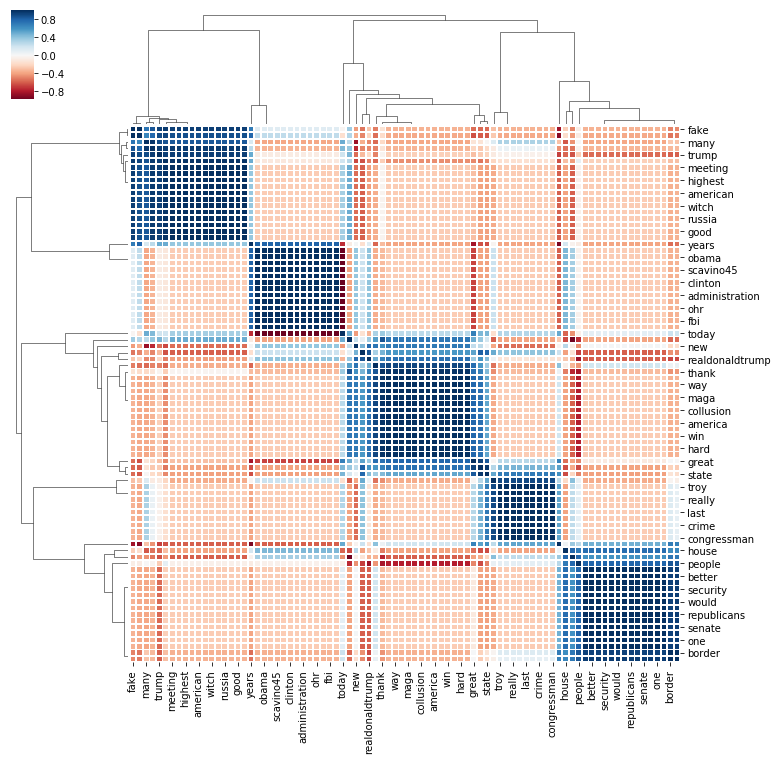

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [98]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda_model, corpus_lda, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      317.431641    8.320638       1        1  45.015793
3      -42.350056   -4.417336       2        1  24.884495
1      227.755859 -242.287582       3        1  10.050527
4      -46.871071 -271.326782       4        1  10.049104
0      123.395515  204.829269       5        1  10.000084, topic_info=     Category        Freq             Term       Total  loglift  logprob
24    Default  231.000000            great  231.000000  30.0000  30.0000
113   Default  153.000000        president  153.000000  29.0000  29.0000
12    Default   75.000000           border   75.000000  28.0000  28.0000
117   Default  161.000000            trump  161.000000  27.0000  27.0000
55    Default   80.000000        democrats   80.000000  26.0000  26.0000
292   Default   87.000000            thank   87.000000  25.0000  25.0000
368   Default   76.000000             news   76.000000  24.0000  24.0000
150   Default   65.000000          america   65.000000  23.0000  23.0000
881   Default   30.000000         security   30.000000  22.0000  22.0000
364   Default   81.000000             fake   81.000000  21.0000  21.0000
885   Default   28.000000             wall   28.000000  20.0000  20.0000
194   Default   46.000000           strong   46.000000  19.0000  19.0000
366   Default   61.000000            media   61.000000  18.0000  18.0000
65    Default  126.000000           people  126.000000  17.0000  17.0000
29    Default   40.000000             vote   40.000000  16.0000  16.0000
616   Default   44.000000           united   44.000000  15.0000  15.0000
614   Default   39.000000           states   39.000000  14.0000  14.0000
181   Default   28.000000             make   28.000000  13.0000  13.0000
67    Default   92.000000            years   92.000000  12.0000  12.0000
1032  Default   33.000000  congratulations   33.000000  11.0000  11.0000
5     Default   64.000000          country   64.000000  10.0000  10.0000
22    Default   31.000000         campaign   31.000000   9.0000   9.0000
338   Default   41.000000      congressman   41.000000   8.0000   8.0000
322   Default   33.000000       republican   33.000000   7.0000   7.0000
738   Default   39.000000         governor   39.000000   6.0000   6.0000
91    Default   27.000000              day   27.000000   5.0000   5.0000
44    Default   25.000000       whitehouse   25.000000   4.0000   4.0000
512   Default   33.000000         american   33.000000   3.0000   3.0000
131   Default   83.000000              job   83.000000   2.0000   2.0000
427   Default   16.000000              win   16.000000   1.0000   1.0000
...       ...         ...              ...         ...      ...      ...
1312   Topic5    8.814669           making   13.112302   1.9054  -5.4706
1509   Topic5    7.918410         billions   11.705155   1.9117  -5.5778
181    Topic5   15.907863             make   28.574886   1.7169  -4.8802
292    Topic5   33.424160            thank   87.473724   1.3405  -4.1377
150    Topic5   26.592604          america   65.857285   1.3957  -4.3664
91     Topic5   13.723578              day   27.610849   1.6035  -5.0279
24     Topic5   63.825951            great  231.503113   1.0141  -3.4908
29     Topic5   17.424623             vote   40.177319   1.4672  -4.7891
1032   Topic5   13.914626  congratulations   33.976139   1.4099  -5.0141
296    Topic5   10.018252             hard   21.454411   1.5411  -5.3426
182    Topic5   10.757194              way   23.937157   1.5027  -5.2714
307    Topic5    8.814218             love   18.350267   1.5693  -5.4706
297    Topic5    9.252129             maga   24.427599   1.3317  -5.4222
23     Topic5    9.808258         election   28.114796   1.2495  -5.3638
22     Topic5    9.966435         campaign   31.278587   1.1589  -5.3478
738    Topic5   10.947713         governor   39.203285   1.0269  -5.2539
187    Topic5   16.933537              new   98